In [1]:
from QCircuit import *
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from scipy import constants
%matplotlib inline
from numpy import *
import scipy.ndimage

In [2]:
from wavefunction.wavefunction2d import *
from wavefunction import *
import wavefunction

In [3]:
def load(filename):
    with open(filename, "rb") as f:
        return pickle.load(f)
def dump(obj, filename):
    with open(filename, "wb") as f:
        pickle.dump(obj, f)

# Stability diagram

In [120]:
Ej = 500e9
Ec = 2*1.9e-19**2/5.2e-15/(2*np.pi*1.054e-34)

In [121]:
Ej/Ec

47.69651250912725

In [29]:
FQ8JJ = QCircuit()
FQ8JJ.add_element(QJosephsonJunction('JJA'), ['GND', '5'])
FQ8JJ.add_element(QJosephsonJunction('JJB'), ['1', '5'])
FQ8JJ.add_element(QJosephsonJunction('JJC'), ['2', '3'])
FQ8JJ.add_element(QJosephsonJunction('JJD'), ['1', '3'])
FQ8JJ.add_element(QJosephsonJunction('JJE'), ['6', '7'])
FQ8JJ.add_element(QJosephsonJunction('JJF'), ['5', '7'])
FQ8JJ.add_element(QJosephsonJunction('JJG'), ['3', '7'])
FQ8JJ.add_element(QJosephsonJunction('JJH'), ['4', '7'])

FQ8JJ.add_element(QCapacitance('CA'), ['GND', '5'])
FQ8JJ.add_element(QCapacitance('CB'), ['1', '5'])
FQ8JJ.add_element(QCapacitance('CC'), ['2', '3'])
FQ8JJ.add_element(QCapacitance('CD'), ['1', '3'])
FQ8JJ.add_element(QCapacitance('CE'), ['6', '7'])
FQ8JJ.add_element(QCapacitance('CF'), ['5', '7'])
FQ8JJ.add_element(QCapacitance('CG'), ['3', '7'])
FQ8JJ.add_element(QCapacitance('CH'), ['4', '7'])

phia = QVariable('φa')
phic = QVariable('φc')
phie = QVariable('φe')
phie1 = QVariable('φe1')

phia.create_grid(12, 1)
phic.create_grid(12, 1)
phie.create_grid(12, 1)
phie1.create_grid(12, 1)

FQ8JJ.add_variable(phia)
FQ8JJ.add_variable(phic)
FQ8JJ.add_variable(phie)
FQ8JJ.add_variable(phie1)

FQ8JJ.map_nodes_linear(['GND', '1', '2', '3', '4','5','6','7'], 
                       ['φa', 'φc', 'φe', 'φe1'], 
                       np.asarray([[0,0,0,0], [0,0,0,1], [0,0,0,2], [0,1,0,2], [0,1,0,3],[-1,0,0,0],[-1,0,0,1],[-1,0,1,1]]))


alpha = 0.7
flux_steps = 50

energies = np.zeros((flux_steps,4), dtype=np.float)

Ej = 150e9
Ec = 2*1.9e-19**2/5.2e-15/(2*np.pi*1.054e-34)
FQ8JJ.find_element('JJA').set_critical_current(Ej)
FQ8JJ.find_element('JJC').set_critical_current(Ej)
FQ8JJ.find_element('CA').set_capacitance(2/Ec)
FQ8JJ.find_element('CC').set_capacitance(2/Ec)
FQ8JJ.find_element('JJF').set_critical_current(Ej)
FQ8JJ.find_element('JJH').set_critical_current(Ej)
FQ8JJ.find_element('CF').set_capacitance(2/Ec)
FQ8JJ.find_element('CH').set_capacitance(2/Ec)

FQ8JJ.find_element('JJB').set_critical_current(Ej*alpha)
FQ8JJ.find_element('CB').set_capacitance(2*alpha/Ec)
FQ8JJ.find_element('JJD').set_critical_current(Ej*alpha)
FQ8JJ.find_element('CD').set_capacitance(2*alpha/Ec)
FQ8JJ.find_element('JJE').set_critical_current(Ej*alpha)
FQ8JJ.find_element('CE').set_capacitance(2*alpha/Ec)
FQ8JJ.find_element('JJG').set_critical_current(Ej*alpha)
FQ8JJ.find_element('CG').set_capacitance(2*alpha/Ec)

phi_range = np.linspace(-2*np.pi, 2*np.pi, flux_steps)

for phie_id, phie_value in enumerate(np.linspace(-2*np.pi, 2*np.pi, flux_steps)):
    phie.set_parameter(phie_value, 0)
    FQ8JJ.calculate_potentials()
    [eigenenergies, eigenfunctions] = FQ8JJ.diagonalize_phase(num_states=4)
    energies[phie_id, :] = eigenenergies
    #print('φe_id: {0}, gap: {2}'.format(phie_id, eigenenergies[1]-eigenenergies[0]))

C:\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:71: ComplexWarning: Casting complex values to real discards the imaginary part


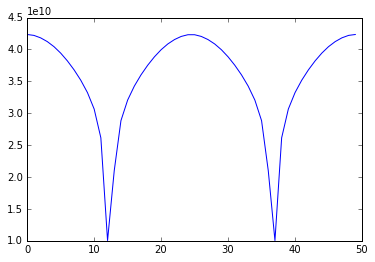

In [30]:
plt.plot(energies[:,1]-energies[:,0])

In [255]:
# Создаем двумерную матрицу-сетку
xgrid, ygrid = np.meshgrid(phi_range1/np.pi/2,phi_range2/np.pi/2)

# В узлах рассчитываем значение функции
zgrid0 = xgrid+ygrid
zgrid1 = xgrid+ygrid
zgrid2 = xgrid+ygrid

for i in arange (0, flux_steps-1, 1):
    for j in arange (0, flux_steps-1, 1):
        zgrid0[j][i]=energies[i,j,0]
        zgrid1[j][i]=energies[i,j,1]
        zgrid2[j][i]=energies[i,j,1]-energies[i,j,0]

(-1.0, 1.0, -1.0, 1.0)

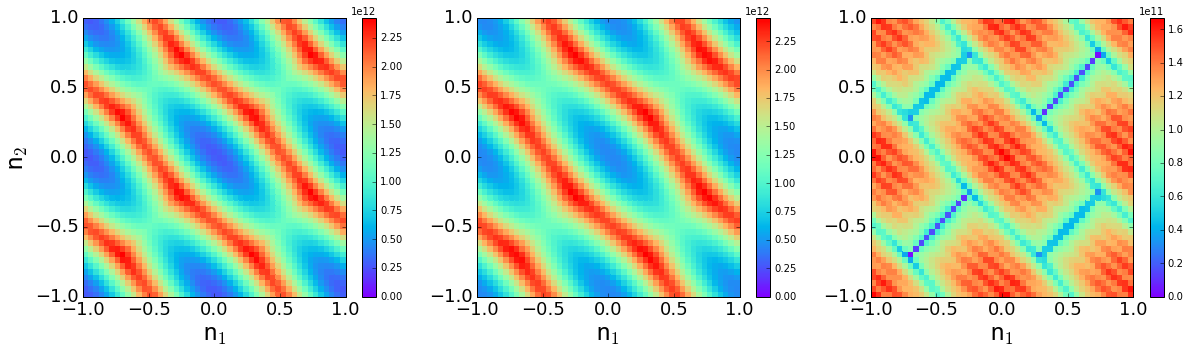

In [256]:
hfont = {'fontname':'Arial'}
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

#plt.ylim(xgrid.min(),xgrid.max())
#plt.xlim(ygrid.min(),ygrid.max())

p = axes[0].pcolor(ygrid, xgrid, zgrid0, cmap=cm.rainbow,  vmin=zgrid0.min(), vmax=zgrid0.max())
cb = fig.colorbar(p, ax=axes[0])
axes[0].set_xlabel(r'n$_1$', fontsize=24, **hfont)
axes[0].set_ylabel(r'n$_2$', fontsize=24, **hfont)
axes[0].tick_params(axis='x', labelsize=18)
axes[0].tick_params(axis='y', labelsize=18)
axes[0].set_xticks(arange(-1, 1.1, 0.5));
axes[0].set_xticks(arange(-1, 1.1, 0.5));
axes[0].axis('tight')
#cb.set_label('Potential', labelpad=25, rotation=270, fontsize=24, **hfont)
p = axes[1].pcolor(ygrid, xgrid, zgrid1, cmap=cm.rainbow,  vmin=zgrid1.min(), vmax=zgrid1.max())
cb = fig.colorbar(p, ax=axes[1])
axes[1].set_xlabel(r'n$_1$', fontsize=24, **hfont)
#axes[1].set_ylabel(r'n$_2$', fontsize=24, **hfont)
axes[1].tick_params(axis='x', labelsize=18)
axes[1].tick_params(axis='y', labelsize=18)
axes[1].set_xticks(arange(-1, 1.1, 0.5));
axes[1].set_xticks(arange(-1, 1.1, 0.5));
axes[1].axis('tight')

p = axes[2].pcolor(ygrid, xgrid, zgrid2, cmap=cm.rainbow,  vmin=zgrid2.min(), vmax=zgrid2.max())
cb = fig.colorbar(p, ax=axes[2])
axes[2].set_xlabel(r'n$_1$', fontsize=24, **hfont)
#axes[2].set_ylabel(r'n$_2$', fontsize=24, **hfont)
axes[2].set_xticks(arange(-1, 1.1, 0.5));
axes[2].set_xticks(arange(-1, 1.1, 0.5));
axes[2].tick_params(axis='x', labelsize=18)
axes[2].tick_params(axis='y', labelsize=18)
axes[2].axis('tight')


#plt.gcf().set_size_inches(20,5)
#plt.savefig("C:/neon/2generation_twin_qubit.pdf", bbox_inches="tight")


# Crossection

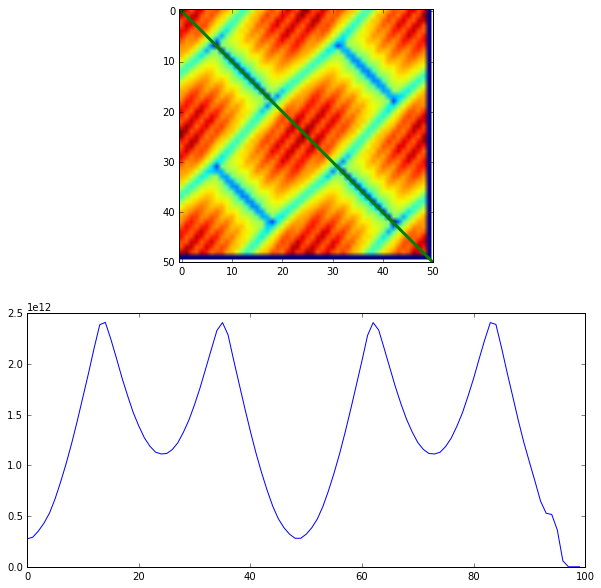

In [258]:
x0, y0 = 0, 0 # These are in _pixel_ coordinates!!
x1, y1 = 50, 50
num = 100
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

# Extract the values along the line, using cubic interpolation
zi = scipy.ndimage.map_coordinates(zgrid0, np.vstack((x,y)))

#-- Plot...
fig, axes = plt.subplots(nrows=2,  figsize=(10, 10))
axes[0].imshow(zgrid2)
axes[0].plot([x0, x1], [y0, y1], 'g', linewidth=3.0)
axes[0].axis('image')

axes[1].plot(zi)

plt.show()


# Производная

In [252]:
first_derivative = np.gradient(zi)
second_derivative = np.gradient(first_derivative)

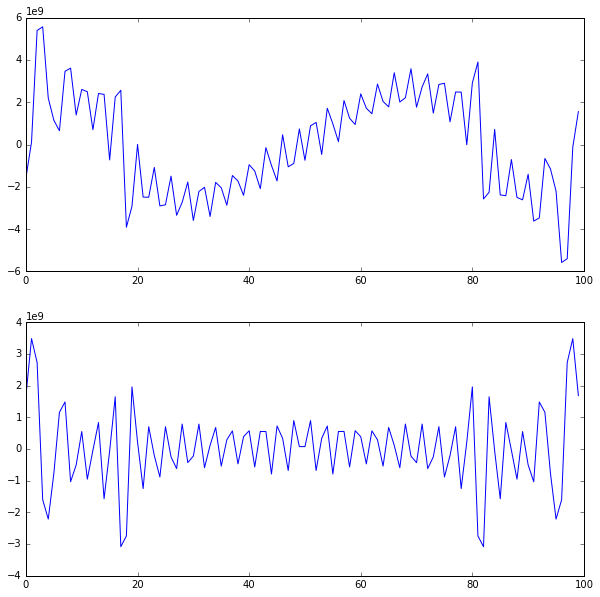

In [253]:
fig, axes = plt.subplots(nrows=2,  figsize=(10, 10))
axes[0].plot(first_derivative)
axes[1].plot(second_derivative)
plt.show()

In [202]:
1/second_derivative[500]

-1.3103957841211111e-07

# Цикличное вычисление индуктивности

In [244]:
num = 1000
inductivity = []

for i in arange(1,1000,1):
    x0, y0 = i, 0            # These are in _pixel_ coordinates!!
    x1, y1 = 0, i
    x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)   
    zi = scipy.ndimage.map_coordinates(zgrid0, np.vstack((x,y)))   # Extract the values along the line, using cubic interpolation
    first_derivative = np.gradient(zi)
    second_derivative = np.gradient(first_derivative)
    inductivity.append(1/second_derivative[500])

C:\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in double_scalars


In [245]:
impedance = inductivity[50]*10e9

In [246]:
impedance 

529.69895776972623

In [247]:
S21 = 2*50/(impedance +2*50)

In [248]:
S21

0.15880604337377491